# Exercise 1 - Linear regression

In [1]:
# Part 1: warm-up
A = eye(5)

5×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

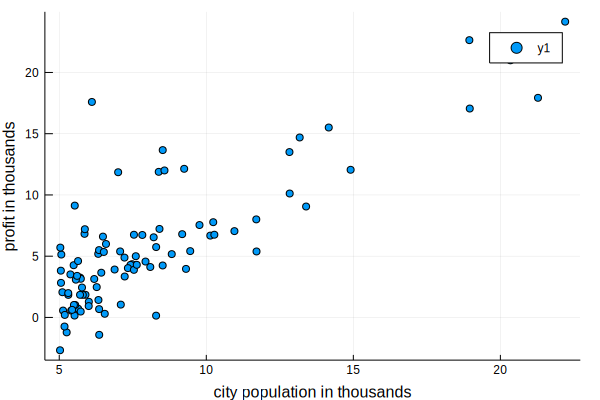

In [5]:
# Part 2: scatter initial data
using CSV, Plots, LinearLeastSquares
data = CSV.read("/Users/kevinliu/Documents/machine-learning-ex1/ex1/ex1data1.txt", datarow=1);
x = Vector(data[:, 1]); y = Vector(data[:, 2]);
m = length(y); # number of training examples
scatter(x, y, xlabel="city population in thousands", ylabel="profit in thousands")

### Cost and gradient descent

In [6]:
# Part 3: cost and gradient descent
X = hcat(ones(m, 1), Vector(data[:, 1]));

# define cost function J
J(θ) = 1 / (2 * m) * sum((X * θ - y) .^ 2)

# test cost function J
J([0.0, 0.0])
# => 32.072733877455676 as expected

J([-1, 2])
# => 54.24245508201238 as expected

# minimize J
using Optim
optimize(J, zeros(2), BFGS())

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0]
 * Minimizer: [-3.895780878170897,1.19303364420903]
 * Minimum: 4.476971e+00
 * Iterations: 2
 * Convergence: true
   * |x - x'| ≤ 1.0e-32: false 
     |x - x'| = 3.97e+00 
   * |f(x) - f(x')| ≤ 1.0e-32 |f(x)|: false
     |f(x) - f(x')| = 3.20e-01 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 2.64e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 7
 * Gradient Calls: 7

### Plotting

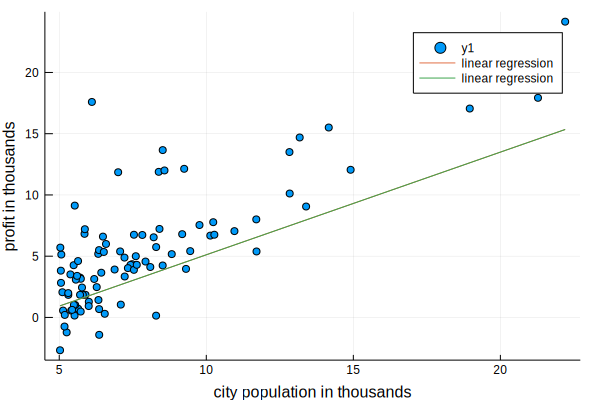

In [5]:
# Plot linear regression onto scatter
θ = [-3.895780878170897, 1.19303364420903]
feature_xaxis = [minimum(X[:,2]),  maximum(X[:,2])]
regress_yaxis = (1 ./ θ[2]) .* (feature_xaxis + θ[1])
plot!(feature_xaxis, regress_yaxis, label="linear regression")

In [6]:
# Hypothesis (prediction function) (not on assignment)
h(θ, X) = θ' .* X
mean(h(θ, X)[:, 2] .== y)

0.0